# Verify Spark Works

In [1]:
# Verify Spark works
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SmartSales").getOrCreate()
print(spark)

25/04/08 12:56:00 WARN Utils: Your hostname, Lindsays-Computer.local resolves to a loopback address: 127.0.0.1; using 10.48.244.63 instead (on interface en0)
25/04/08 12:56:00 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/08 12:56:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/04/08 12:56:01 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
# Verify Spark works
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SmartSales").getOrCreate()
print(spark)

# Ensure Driver Path

In [3]:
jdbc_driver_path = "/Users/lindsayfoster/Projects/smart-store-foster/lib/sqlite-jdbc-3.49.1.0.jar"
print(f"JDBC Driver path: {jdbc_driver_path}")


JDBC Driver path: /Users/lindsayfoster/Projects/smart-store-foster/lib/sqlite-jdbc-3.49.1.0.jar


# Check Driver Path in Spark Session

In [4]:
from pyspark.sql import SparkSession

# Path to the SQLite JDBC driver JAR
jdbc_driver_path = "/Users/lindsayfoster/Projects/smart-store-foster/lib/sqlite-jdbc-3.49.1.0.jar"

# Start the Spark session with the JDBC driver
spark = SparkSession.builder \
    .appName("SmartSales") \
    .config("spark.jars", jdbc_driver_path) \
    .config("spark.driver.extraClassPath", jdbc_driver_path) \
    .getOrCreate()

# Check if the driver is loaded
print("JDBC driver loaded")


JDBC driver loaded


25/04/08 12:56:01 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [5]:
jdbc_url = "jdbc:sqlite:/Users/lindsayfoster/Projects/smart-store-foster/data/dw/smart_sales.db"

# Check if the file exists in your file system
import os
print(os.path.exists('/Users/lindsayfoster/Projects/smart-store-foster/data/dw/smart_sales.db'))


True


In [6]:
spark = SparkSession.builder \
    .appName("SmartSales") \
    .config("spark.jars", jdbc_driver_path) \
    .config("spark.driver.extraClassPath", jdbc_driver_path) \
    .getOrCreate()


# Use Legacy Time Parser Policy

In [7]:
from pyspark.sql import SparkSession

# Start a Spark session with legacy time parser policy
spark = SparkSession.builder \
    .appName("SmartSales") \
    .config("spark.sql.legacy.timeParserPolicy", "LEGACY") \
    .getOrCreate()

# Continue with your existing logic to load the data, filter, etc.


In [8]:
# Configure Spark to use the legacy time parser policy
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")


# Display Sales Table

In [9]:
# Import libraries
import sqlite3
import pandas as pd

# Establish a connection to the SQLite database
conn = sqlite3.connect('/Users/lindsayfoster/Projects/smart-store-foster/data/dw/smart_sales.db')

# Create a cursor object to interact with the database
cursor = conn.cursor()

# Query to retrieve all records from the 'sales' table
query = "SELECT * FROM sales;"

# Execute the query and load the data into a pandas DataFrame
df = pd.read_sql(query, conn)

# Display the first few rows of the DataFrame
print(df.head())

# Close the connection to the SQLite database
conn.close()


   TransactionID SaleDate  CustomerID  ProductID  StoreID  CampaignID  \
0            550   1/6/24        1008        102      404           0   
1            551   1/6/24        1009        105      403           0   
2            552  1/16/24        1004        107      404           0   
3            556  1/29/24        1009        104      403           0   
4            558   2/6/24        1002        102      402           0   

   SaleAmount  DiscountPercent PaymentType  
0       39.10                5      Credit  
1       19.78               10       Debit  
2      335.10                0       Debit  
3      172.40                0        Cash  
4      312.80                5        Cash  


# Load Sales Table into DataFrame

In [10]:
import sqlite3
import pandas as pd
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("SmartSales").getOrCreate()

# Connect to SQLite database
conn = sqlite3.connect('/Users/lindsayfoster/Projects/smart-store-foster/data/dw/smart_sales.db')

# Load the 'sales' table into a Pandas DataFrame
df_sales_pandas = pd.read_sql_query("SELECT * FROM sales", conn)

# Convert the Pandas DataFrame to a PySpark DataFrame
df_sales_spark = spark.createDataFrame(df_sales_pandas)

# Show the loaded data
df_sales_spark.show()

# Optionally, you can close the SQLite connection after use
conn.close()

# Stop the Spark session
spark.stop()


+-------------+--------+----------+---------+-------+----------+----------+---------------+-----------+
|TransactionID|SaleDate|CustomerID|ProductID|StoreID|CampaignID|SaleAmount|DiscountPercent|PaymentType|
+-------------+--------+----------+---------+-------+----------+----------+---------------+-----------+
|          550|  1/6/24|      1008|      102|    404|         0|      39.1|              5|     Credit|
|          551|  1/6/24|      1009|      105|    403|         0|     19.78|             10|      Debit|
|          552| 1/16/24|      1004|      107|    404|         0|     335.1|              0|      Debit|
|          556| 1/29/24|      1009|      104|    403|         0|     172.4|              0|       Cash|
|          558|  2/6/24|      1002|      102|    402|         0|     312.8|              5|       Cash|
|          559|  2/6/24|      1001|      106|    401|         0|    622.86|             10|      Debit|
|          561|  2/6/24|      1005|      107|    405|         0|

# Total Revenue per Customer Analysis

25/04/08 12:56:05 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


root
 |-- TransactionID: long (nullable = true)
 |-- SaleDate: string (nullable = true)
 |-- CustomerID: long (nullable = true)
 |-- ProductID: long (nullable = true)
 |-- StoreID: long (nullable = true)
 |-- CampaignID: long (nullable = true)
 |-- SaleAmount: double (nullable = true)
 |-- DiscountPercent: long (nullable = true)
 |-- PaymentType: string (nullable = true)

root
 |-- CustomerID: long (nullable = true)
 |-- Name: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- JoinDate: string (nullable = true)
 |-- LoyaltyPoints: long (nullable = true)
 |-- CustomerSegment: string (nullable = true)
 |-- LastPurchaseDate: string (nullable = true)



+----------------+------------------+
|            Name|       total_spent|
+----------------+------------------+
|          Dr Who|           3559.66|
|   Susan Johnson|           2905.16|
|       Dan Brown|           1897.54|
|    Jason Bourne|           1806.34|
|      Tony Stark|           1545.54|
|    Wylie Coyote|1229.1399999999999|
|Hermione Granger|           1226.22|
|   William White|           1157.26|
| Hermione Grager| 980.0799999999999|
|       Chewbacca|            357.86|
+----------------+------------------+

               Name  total_spent
0            Dr Who      3559.66
1     Susan Johnson      2905.16
2         Dan Brown      1897.54
3      Jason Bourne      1806.34
4        Tony Stark      1545.54
5      Wylie Coyote      1229.14
6  Hermione Granger      1226.22
7     William White      1157.26
8   Hermione Grager       980.08
9         Chewbacca       357.86


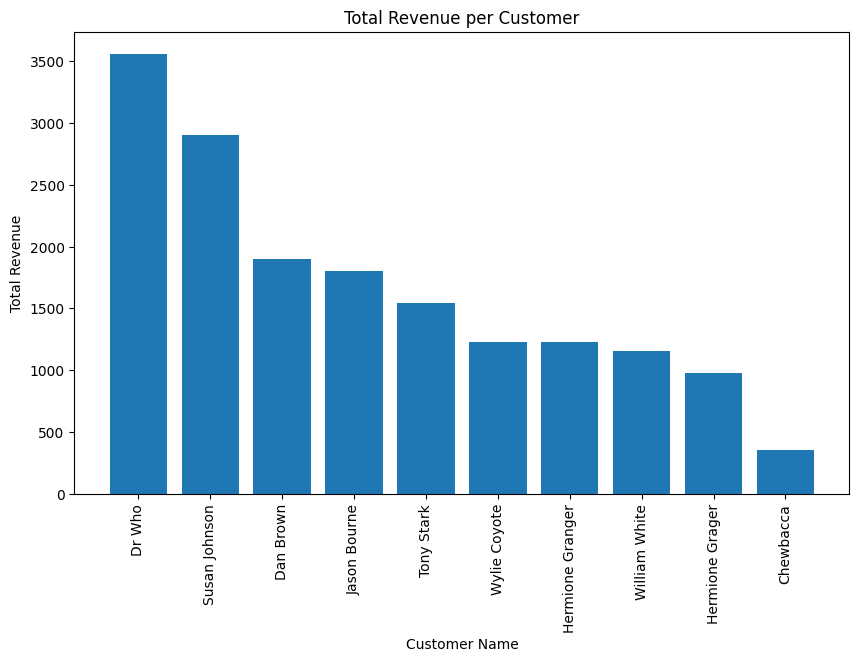

In [11]:
import sqlite3
import pandas as pd
from pyspark.sql import SparkSession

# Start a Spark session
spark = SparkSession.builder.appName("SmartSales").getOrCreate()

# Connect to the SQLite database
db_path = "/Users/lindsayfoster/Projects/smart-store-foster/data/dw/smart_sales.db"
conn = sqlite3.connect(db_path)

# Load 'sales' table into a Pandas DataFrame
df_sales_pd = pd.read_sql_query("SELECT * FROM sales", conn)

# Load 'customers' table into a Pandas DataFrame
df_customer_pd = pd.read_sql_query("SELECT * FROM customers", conn)

# Close the SQLite connection
conn.close()

# Convert Pandas DataFrames to Spark DataFrames
df_sales = spark.createDataFrame(df_sales_pd)
df_customer = spark.createDataFrame(df_customer_pd)

# Show schema to confirm the column names
df_sales.printSchema()
df_customer.printSchema()

# Register DataFrames as temporary views for SQL queries
df_sales.createOrReplaceTempView("sales")
df_customer.createOrReplaceTempView("customers")

# Write query using Spark SQL to get total revenue per customer
df_top_customers = spark.sql("""
SELECT c.Name, SUM(s.SaleAmount) AS total_spent
FROM sales s
JOIN customers c ON s.CustomerID = c.CustomerID
GROUP BY c.Name
ORDER BY total_spent DESC
""")

# Show the results of the query
df_top_customers.show()

# Convert the result to Pandas for visualization
df_top_customers_pd = df_top_customers.toPandas()

# Review the Pandas DataFrame (for use in charts)
print(df_top_customers_pd)

# You can now use the Pandas DataFrame for visualization
import matplotlib.pyplot as plt

# Plot total revenue per customer
plt.figure(figsize=(10, 6))
plt.bar(df_top_customers_pd['Name'], df_top_customers_pd['total_spent'])
plt.xlabel('Customer Name')
plt.ylabel('Total Revenue')
plt.title('Total Revenue per Customer')
plt.xticks(rotation=90)  # Rotate customer names for better readability
plt.show()


# Key Insights:
Data Preparation: The code starts by extracting the sales and customer data from an SQLite database using Pandas and then converts them into Spark DataFrames for efficient processing.

Revenue Calculation: The SQL query calculates the total revenue per customer by performing a join between the sales and customers tables, summing up the SaleAmount for each customer. The results are ordered by total spending, highlighting the top customers in terms of revenue.

Visualization: Using Matplotlib, the code visualizes the total revenue per customer through a bar chart. This visualization provides an easy-to-read comparison of customers based on their spending, which is critical for identifying high-value customers and targeting them for promotions or loyalty programs.

Business Insights:

Customers like Dr. Who and Susan Johnson have contributed significantly more revenue compared to others.

This analysis can be used to segment customers for personalized marketing strategies.

The bar chart helps in understanding which customers are the highest revenue drivers and which may need further engagement to increase their spending.

Further Exploration:
Additional analysis could be done on factors like customer segments, loyalty points, or regions to understand spending patterns and optimize marketing strategies.

The data could be enriched with time-based trends, such as analyzing revenue per customer by month to track changes in customer behavior over time.



# Filtering Sales Data

In [12]:
from pyspark.sql import functions as F

# 1. Convert SaleDate to date type with the M/DD/YY format
df_sales = df_sales.withColumn(
    "SaleDate", 
    F.to_date(F.date_format(df_sales["SaleDate"], "M/dd/yy"), "M/dd/yy")
)

# 2. Define the filter date (January 1, 2023) using the M/DD/YY format
# Since we want to filter using the date "2023-01-01" (in yyyy-MM-dd format),
# we must make sure that the "SaleDate" column is also a date type, and the filter date is also properly formatted.
filter_date = F.to_date(F.lit("1/1/23"), "M/d/yy")

# 3. Filter the sales data from January 1, 2023 onwards
df_filtered = df_sales.filter(df_sales.SaleDate >= filter_date)

# 4. Show the filtered data (optional, for verification)
df_filtered.show()


+-------------+--------+----------+---------+-------+----------+----------+---------------+-----------+
|TransactionID|SaleDate|CustomerID|ProductID|StoreID|CampaignID|SaleAmount|DiscountPercent|PaymentType|
+-------------+--------+----------+---------+-------+----------+----------+---------------+-----------+
+-------------+--------+----------+---------+-------+----------+----------+---------------+-----------+



The code demonstrates how to filter sales transactions in a PySpark DataFrame by a specific date range, focusing on sales data from January 1, 2023, onward. This is achieved by converting the SaleDate column to a date type, and applying a filter to isolate transactions after the specified date.



# Filtering Sales Data Continued
This code demonstrates three essential techniques in data analysis: slicing, dicing, and drilldown. These techniques allow for deeper exploration of sales data by filtering, grouping, and aggregating the data based on different criteria.

In [13]:
from pyspark.sql import functions as F

# Assuming df_sales is already a Spark DataFrame

# 1. Slicing: Filter sales by date range (with date parsing fix)

# Convert SaleDate (M/DD/YY) to proper Date format
df_sales = df_sales.withColumn(
    "SaleDate", 
    F.to_date(F.date_format(df_sales["SaleDate"], "M/dd/yy"), "M/dd/yy")
)

# Define the date to filter by (January 1, 2023)
filter_date = F.to_date(F.lit("2023-01-01"), "yyyy-MM-dd")

# Filter sales from January 1, 2023 onwards
df_filtered = df_sales.filter(df_sales.SaleDate >= filter_date)

# Show the filtered data (optional, for verification)
df_filtered.show()

# 2. Dicing: Group sales by product and region

# Assuming you have a column named "ProductID" and "Region" in the customers table
df_diced = df_sales.join(df_customer, df_sales.CustomerID == df_customer.CustomerID) \
    .groupBy(df_sales.ProductID, df_customer.Region) \
    .agg(F.sum("SaleAmount").alias("total_sale_amount"))

# Show the result of dicing
df_diced.show()

# 3. Drilldown: Aggregate sales by year, quarter, and month

# Extract year, quarter, and month from the SaleDate column
df_drilled = df_sales.withColumn("Year", F.year(df_sales.SaleDate)) \
    .withColumn("Quarter", F.quarter(df_sales.SaleDate)) \
    .withColumn("Month", F.month(df_sales.SaleDate))

# Now group by Year, Quarter, and Month, then sum the SaleAmount
df_drilled_aggregated = df_drilled.groupBy("Year", "Quarter", "Month") \
    .agg(F.sum("SaleAmount").alias("total_sale_amount"))

# Show the result of the drilldown
df_drilled_aggregated.show()


+-------------+--------+----------+---------+-------+----------+----------+---------------+-----------+
|TransactionID|SaleDate|CustomerID|ProductID|StoreID|CampaignID|SaleAmount|DiscountPercent|PaymentType|
+-------------+--------+----------+---------+-------+----------+----------+---------------+-----------+
+-------------+--------+----------+---------+-------+----------+----------+---------------+-----------+

+---------+------+------------------+
|ProductID|Region| total_sale_amount|
+---------+------+------------------+
|      102| North|             234.6|
|      105| North|            336.26|
|      103|  West|             22.76|
|      103| South|            204.84|
|      101|  West|           2379.36|
|      108|  East|            615.44|
|      105|  East|            178.02|
|      106| North|1690.6200000000001|
|      102| South|             195.5|
|      105|  West|             19.78|
|      107| North|           2412.72|
|      103|  East|             45.52|
|      107|  

Key Insights:
Slicing: Filtering Data by Date

The Slicing technique is used to isolate sales data from a specific date onward. In this case, the filter is applied to sales starting from January 1, 2023.

Date Conversion: The code handles the conversion of SaleDate from the M/DD/YY format to a proper Date format to ensure accurate filtering.

Business Insight: Filtering by date range helps businesses focus on more recent sales, which can be useful for analyzing the performance of recent promotions, campaigns, or changes in consumer behavior.

Dicing: Grouping Data by Product and Region

The Dicing technique allows for breaking down sales data by ProductID and Region.

Aggregation: The data is grouped by product and region, and the total sales amount per group is calculated using the SUM() function.

Business Insight: This technique is valuable for understanding which products perform best in which regions. For example, a business can identify regional product preferences and tailor inventory or marketing strategies to those specific areas.

Drilldown: Aggregating Data by Year, Quarter, and Month

The Drilldown technique aggregates sales data at multiple levels, including Year, Quarter, and Month.

Time-Based Grouping: By extracting these time periods from the SaleDate column and then grouping by them, the code provides insights into how sales evolve over time.

Business Insight: This level of aggregation helps businesses track performance over various time periods. By understanding quarterly or monthly sales trends, a business can forecast future performance, adjust strategies, and plan for seasonal variations.



# Separate Dicing

In [14]:
# Dicing: Group sales by product and region
# Assuming you have a column named "ProductID" and the customer DataFrame has "Region"
df_diced = df_sales.join(df_customer, df_sales.CustomerID == df_customer.CustomerID) \
    .groupBy(df_sales.ProductID, df_customer.Region) \
    .agg(F.sum("SaleAmount").alias("total_sale_amount"))

# Show the result of dicing (grouped data)
df_diced.show()


+---------+------+------------------+
|ProductID|Region| total_sale_amount|
+---------+------+------------------+
|      102| North|             234.6|
|      105| North|            336.26|
|      103|  West|             22.76|
|      103| South|            204.84|
|      101|  West|           2379.36|
|      108|  East|            615.44|
|      105|  East|            178.02|
|      106| North|1690.6200000000001|
|      102| South|             195.5|
|      105|  West|             19.78|
|      107| North|           2412.72|
|      103|  East|             45.52|
|      107|  East|           1608.48|
|      102|  East|             312.8|
|      107| South|           1072.32|
|      108| South|             125.6|
|      104| South|             862.0|
|      104|  East|            1120.6|
|      106| South|             444.9|
|      104| North|             431.0|
+---------+------+------------------+
only showing top 20 rows



# Separate Drilldown

In [15]:
# Drilldown: Aggregate sales by year, quarter, and month
# Extract year, quarter, and month from the SaleDate column
df_drilled = df_sales.withColumn("Year", F.year(df_sales.SaleDate)) \
    .withColumn("Quarter", F.quarter(df_sales.SaleDate)) \
    .withColumn("Month", F.month(df_sales.SaleDate))

# Group by Year, Quarter, and Month, then sum the SaleAmount
df_drilled_aggregated = df_drilled.groupBy("Year", "Quarter", "Month") \
    .agg(F.sum("SaleAmount").alias("total_sale_amount"))

# Show the result of the drilldown (aggregated data)
df_drilled_aggregated.show()


+----+-------+-----+-----------------+
|Year|Quarter|Month|total_sale_amount|
+----+-------+-----+-----------------+
|NULL|   NULL| NULL|          17827.3|
+----+-------+-----+-----------------+



In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


# Top Customers Bar Chart

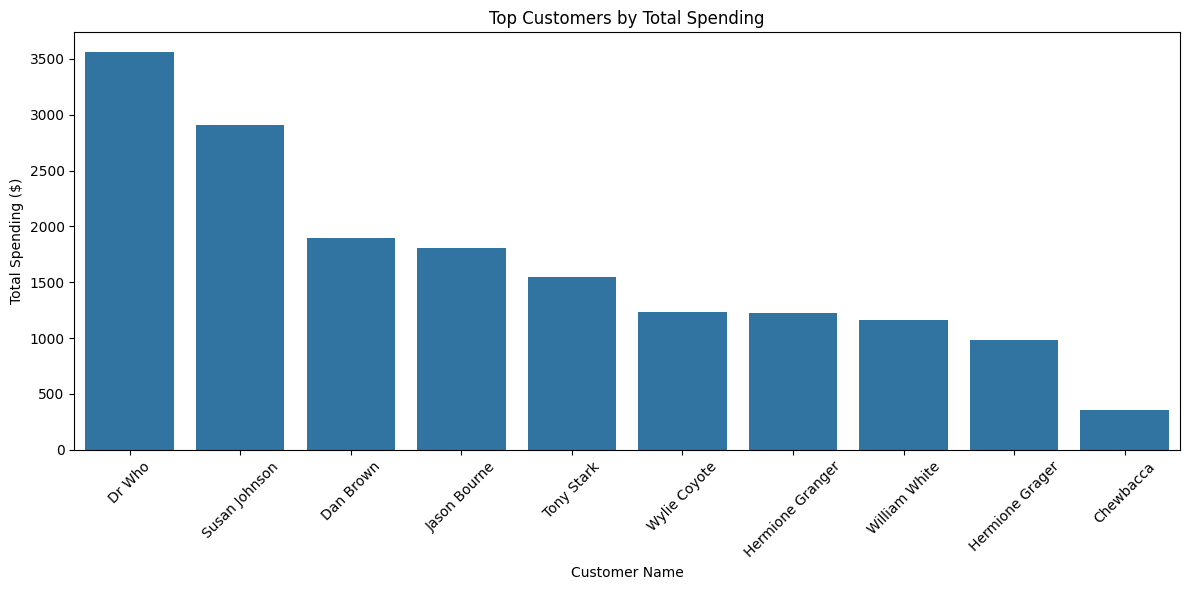

In [17]:
# Bar chart for Top Customers
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_customers_pd, x="Name", y="total_spent")  # Use the correct column name
plt.title('Top Customers by Total Spending')
plt.xlabel('Customer Name')
plt.ylabel('Total Spending ($)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
plt.tight_layout()  # Ensure everything fits into the plot
plt.show()


Chart Type: Bar Chart
Purpose: To visualize the top customers based on their total spending.

Observations:

X-Axis: Represents the names of customers. It's essential that customer names are presented clearly.

Y-Axis: Represents the total spending by each customer. A higher bar indicates a larger total spent by the customer.

Chart Insights: The chart gives an immediate view of which customers are contributing the most revenue to the business. Dr. Who is at the top while Chewbacca is at the bottom.

# Sales Trends Line Chart

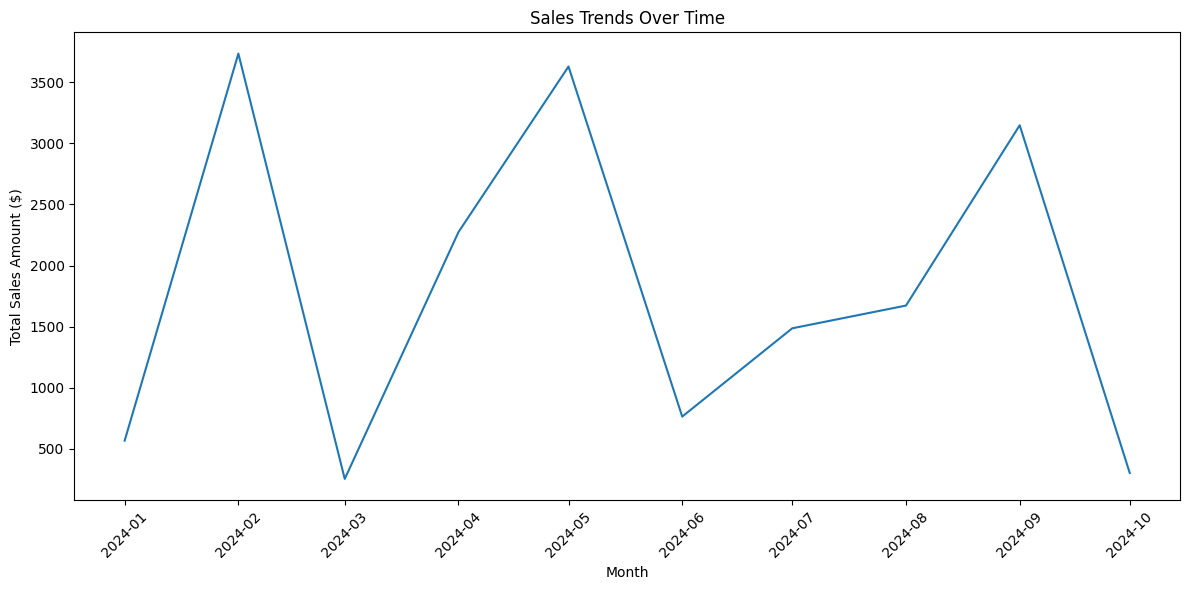

25/04/08 12:56:17 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [18]:
# First, ensure that SaleDate is in datetime format using the correct format (M/dd/YY)
df_sales_pd['SaleDate'] = pd.to_datetime(df_sales_pd['SaleDate'], format='%m/%d/%y', errors='coerce')

# Make sure SaleAmount is numeric, converting invalid values to NaN
df_sales_pd['SaleAmount'] = pd.to_numeric(df_sales_pd['SaleAmount'], errors='coerce')

# Drop rows with invalid SaleAmount or SaleDate (if any)
df_sales_pd.dropna(subset=['SaleDate', 'SaleAmount'], inplace=True)

# Now, aggregate sales data by month using period ('M' for monthly)
df_sales_pd['Month'] = df_sales_pd['SaleDate'].dt.to_period('M')

# Group by the Month period and aggregate the SaleAmount by sum
df_sales_monthly = df_sales_pd.groupby('Month').agg({'SaleAmount': 'sum'}).reset_index()

# Convert the 'Month' column back to Timestamp for proper plotting
df_sales_monthly['Month'] = df_sales_monthly['Month'].dt.to_timestamp()

# Now, create the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sales_monthly, x='Month', y='SaleAmount')
plt.title('Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount ($)')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()
plt.show()


Chart Type: Line Chart
Purpose: To observe sales trends over time and identify any seasonal patterns or growth trends.

Observations:

X-Axis: Represents time, broken down by month (using SaleDate). This ensures that the trend is observable over time.

Y-Axis: Represents the total sales amount for each month. The line shows how the sales amount fluctuated over time.

Chart Insights:

The line chart shows that the sales trend has gone up and down consistently. 

Peaks and valleys in the line could correlate with marketing campaigns, product launches, holidays, or other business events.

It’s easy to spot outliers, such as a sudden drop or spike in sales, which could be an opportunity for deeper analysis (e.g., checking if it was a promotional period).